Dataset size is  (492, 150, 150, 3)
Label size is  (492,)
Train size is  (393, 150, 150, 3)
Test size is  (99, 150, 150, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                

7/7 [==============================] - 2s 323ms/step - loss: 0.0576 - accuracy: 0.9873 - val_loss: 1.1092 - val_accuracy: 0.6869
Epoch 40/100
7/7 [==============================] - 2s 305ms/step - loss: 0.1083 - accuracy: 0.9567 - val_loss: 0.9383 - val_accuracy: 0.6566
Epoch 41/100
7/7 [==============================] - 3s 373ms/step - loss: 0.0624 - accuracy: 0.9924 - val_loss: 1.1987 - val_accuracy: 0.7475
Epoch 42/100
7/7 [==============================] - 3s 384ms/step - loss: 0.1019 - accuracy: 0.9669 - val_loss: 1.1387 - val_accuracy: 0.7071
Epoch 43/100
7/7 [==============================] - 3s 393ms/step - loss: 0.0391 - accuracy: 0.9949 - val_loss: 1.1454 - val_accuracy: 0.7475
Epoch 44/100
7/7 [==============================] - 3s 377ms/step - loss: 0.0265 - accuracy: 0.9949 - val_loss: 1.2008 - val_accuracy: 0.7071
Epoch 45/100
7/7 [==============================] - 2s 349ms/step - loss: 0.0350 - accuracy: 0.9924 - val_loss: 1.4365 - val_accuracy: 0.6768
Epoch 46/100
7/7 [=

7/7 [==============================] - 3s 433ms/step - loss: 0.0183 - accuracy: 0.9924 - val_loss: 2.1327 - val_accuracy: 0.7172
Epoch 97/100
7/7 [==============================] - 3s 470ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.1265 - val_accuracy: 0.7778
Epoch 98/100
7/7 [==============================] - 3s 456ms/step - loss: 8.8706e-04 - accuracy: 1.0000 - val_loss: 2.2263 - val_accuracy: 0.7879
Epoch 99/100
7/7 [==============================] - 3s 383ms/step - loss: 6.3951e-04 - accuracy: 1.0000 - val_loss: 2.4043 - val_accuracy: 0.7879
Epoch 100/100
7/7 [==============================] - 3s 361ms/step - loss: 6.1849e-04 - accuracy: 1.0000 - val_loss: 2.5237 - val_accuracy: 0.7980


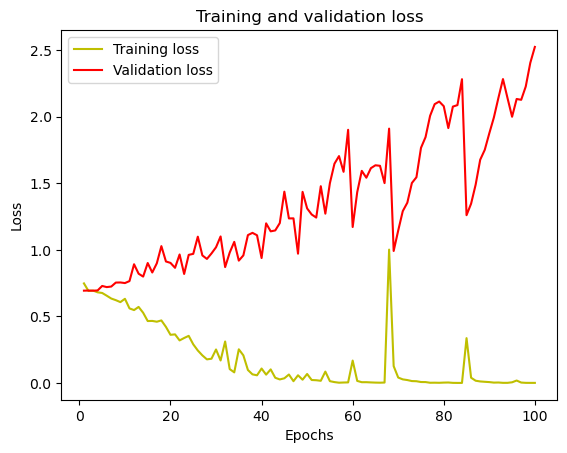

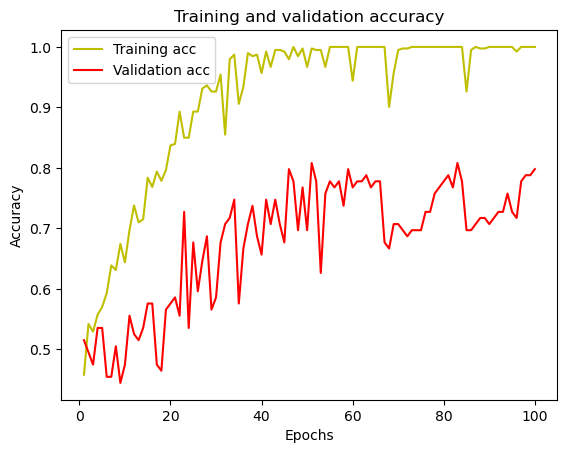

1/1 [==============================] - 0s 130ms/step
The prediction for this image is:  [[8.5846204e-07]]
The actual label for this image is:  0
4/4 [==============================] - 0s 64ms/step - loss: 2.5237 - accuracy: 0.7980
Accuracy =  79.79797720909119 %
4/4 [==============================] - 0s 62ms/step
[[43  8]
 [13 35]]
4/4 [==============================] - 0s 67ms/step


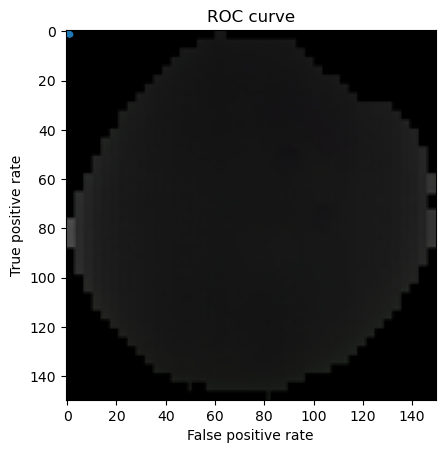

Ideal threshold is:  14    0.420923
Name: thresholds, dtype: float32
Area under curve, AUC =  0.812295751633987


In [1]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
#from keras import backend as K

import os
import cv2
from PIL import Image
import numpy as np

#Test GPU
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

image_directory = 'E:\\Document\\M-Tech\\M-Tech Class\\2nd Trimester\\Assignment\\AI Lab\\Assignment 7\\Datasets\\ch22m503\\'
SIZE = 150
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.


parasitized_images = os.listdir(image_directory + 'parasite\\')
for i, image_name in enumerate(parasitized_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'parasite\\' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)
        
uninfected_images = os.listdir(image_directory + 'uninfected\\')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'uninfected\\' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)
        
dataset = np.array(dataset)
label = np.array(label)
print("Dataset size is ", dataset.shape)
print("Label size is ", label.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)
print("Train size is ", X_train.shape)
print("Test size is ", X_test.shape)

from keras.utils import normalize
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

###Define the model

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))  


model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             #also try adam
              metrics=['accuracy'])

print(model.summary()) 

history = model.fit(X_train, 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 100,      
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )


model.save('models/malaria_model_100epochs.h5')  

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

n=23  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", y_test[n])


#We can load the trained model, so we don't have to train again for 300 epochs!
from keras.models import load_model
# load model
model = load_model('models/malaria_model_100epochs.h5')

#For 300 epochs, giving 82.5% accuracy

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


mythreshold=0.885
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)


#ROC
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()


import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 


from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)